In [93]:
import pandas as pd                   
import numpy as np                      
import seaborn as sbn               
import matplotlib.pyplot as plt            
from sklearn.model_selection import train_test_split


In [94]:
df = pd.read_csv(r"C:\Users\om420\Downloads\housing_missing_data_1000.csv")


In [95]:
df.isnull().mean()*100

GarageQual     10.0
FireplaceQu    40.0
SalePrice       0.0
dtype: float64

In [96]:
x=df
y=df['SalePrice']

In [97]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [98]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [99]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\om420\AppData\Local\Temp\ipykernel_8124\1183295249.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual']

In [100]:
# we are cheking frequency before and after imputation  
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)
    ],    
axis=1)
temp.columns=['original','imputed']

In [101]:
# if there is big diff in frequency then it is a red flag
temp

original  imputed
TA  0.556017  0.55750
Gd  0.225450  0.22625
Fa  0.147994  0.14750
Po  0.048409  0.04750
Ex  0.022130  0.02125

In [102]:
# we are cheking frequency before and after imputation  
temp1 = pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts()/len(X_train)
    ],    
axis=1)
temp1.columns=['original','imputed']

In [103]:
temp1

original  imputed
TA  0.415612  0.40750
Gd  0.280591  0.28750
Fa  0.208861  0.20875
Po  0.061181  0.06250
Ex  0.033755  0.03375

C:\Users\om420\AppData\Local\Temp\ipykernel_8124\4273199641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\om420\AppData\Local\Temp\ipykernel_8124\4273199641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

<function matplotlib.pyplot.show(close=None, block=None)>

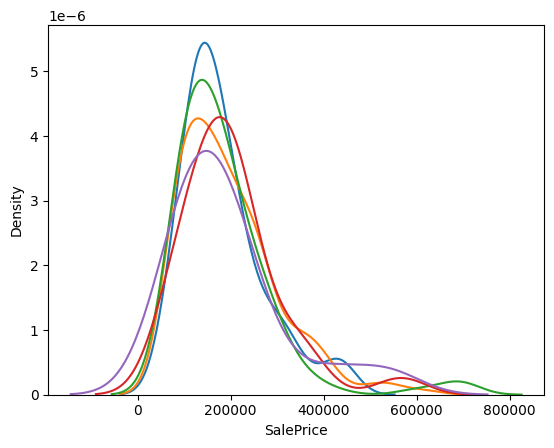

In [104]:
for category in X_train['FireplaceQu'].dropna().unique():
    sbn.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.show

C:\Users\om420\AppData\Local\Temp\ipykernel_8124\2936332760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\om420\AppData\Local\Temp\ipykernel_8124\2936332760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

<function matplotlib.pyplot.show(close=None, block=None)>

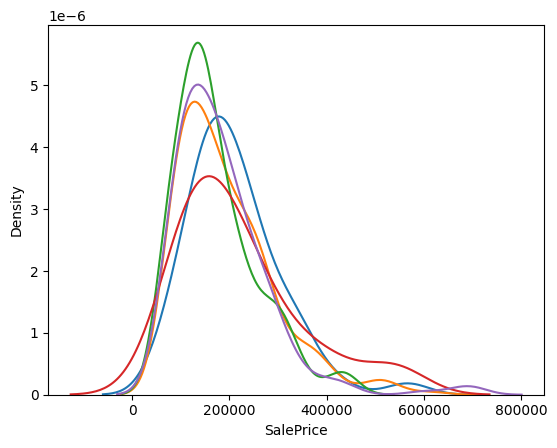

In [105]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sbn.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show

#Missing Indiacator 


In [106]:
from sklearn.impute import SimpleImputer,MissingIndicator


In [107]:
mis=pd.read_csv(r"C:\Users\om420\Downloads\titanic_10000.csv",usecols=['Age','Fare','Survived'])
mis.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [108]:
X=mis.drop(columns=['Survived'])
Y=mis['Survived']

In [109]:
x_train,x_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [110]:
x_train

Age     Fare
9254  35.0   8.0500
1561  38.0  71.2833
1670  22.0   7.2500
6087   2.0  21.0750
6669  14.0  30.0708
...    ...      ...
5734  35.0   8.0500
5191  38.0  71.2833
5390  22.0   7.2500
860   22.0   7.2500
7270  22.0   7.2500

[8000 rows x 2 columns]

In [111]:
si=SimpleImputer(add_indicator=True)


In [112]:
x_train_trf=si.fit_transform(x_train)
x_test_trf=si.transform(x_test)

In [113]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train_trf,Y_train)
y_pred=clf.predict(x_test_trf)

In [121]:
#checking accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)*100

79.95